In [1]:
from PIL import Image
import matplotlib.pyplot as plt

## Segmentatation

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-segmentation", model="Thalirajesh/Aerial-Drone-Image-Segmentation")

c:\Users\picokatx\Documents\drone_odessey\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [3]:
image = Image.open("data/1.jpeg").resize((224,224))
results = pipe(image)
results

[{'score': None,
  'label': 'paved-area',
  'mask': <PIL.Image.Image image mode=L size=224x224>},
 {'score': None,
  'label': 'gravel',
  'mask': <PIL.Image.Image image mode=L size=224x224>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=224x224>},
 {'score': None,
  'label': 'roof',
  'mask': <PIL.Image.Image image mode=L size=224x224>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=224x224>},
 {'score': None,
  'label': 'obstacle',
  'mask': <PIL.Image.Image image mode=L size=224x224>}]

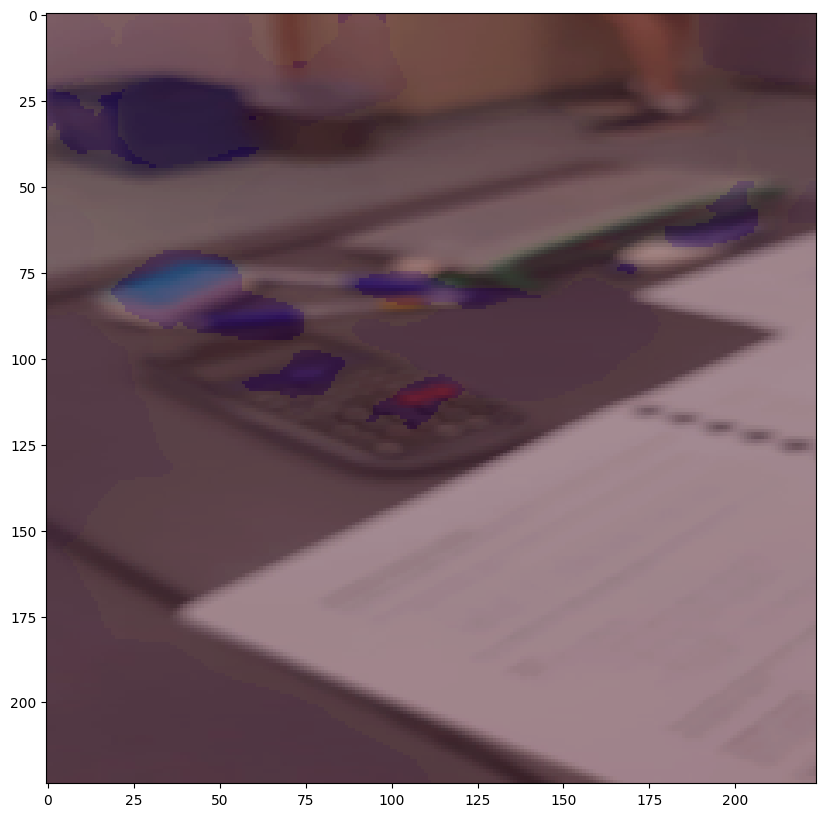

In [8]:
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.imshow(results[0]['mask'], alpha=0.1)
plt.imshow(results[1]['mask'], alpha=0.1)
plt.imshow(results[2]['mask'], alpha=0.1)
plt.imshow(results[3]['mask'], alpha=0.1)
plt.imshow(results[4]['mask'], alpha=0.1)
plt.show()

NameError: name 'plt' is not defined

## Tello

In [4]:
from djitellopy import Tello

tello = Tello()
tello.connect()

[INFO] tello.py - 129 - Tello instance was initialized. Host: '192.168.10.1'. Port: '8889'.


In [ ]:
# Definitely need basic controls
# ai recognition -> 
# catd info
# catd AI powered visual sensing. work with drone - detect object of interst, perform task
# 30% present 70% drone perform
# 5 min presentation 5min qna
# visual materials allowed.